In [2]:
#IMPORTAR PAQUETES NECESARIOS.
import re 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

#MATRIX TÉRMINO-DOCUMENTO
from sklearn.feature_extraction.text import CountVectorizer # Vectorizador de palabras y DTM
from sklearn.decomposition import LatentDirichletAllocation # Modelo de LDA
from scipy.sparse import csr_matrix # Para tratar Sparse Matrix


#LDA
import pyLDAvis 
from pyLDAvis import sklearn as sklearnlda #EXPORTAR EL MODELO (VISUALIZACIÓN)

#WORDCLOUD
from wordcloud import WordCloud

In [3]:
#CAMBIAR AQUÍ EL ARCHIVO
df = pd.read_csv("final_db.csv")

# LIMPIEZA 

In [6]:
#VEAMOS ALGUNOS TWEETS:
for i in df["tweet"][10000:10010]:
    print(i)
    print("\n////////////////////////////////")

#EL TRABAJO DE LIMPIEZA ES BASTANTE

@realDonaldTrump are you watching your president like the rest of us?!
#bidenharis2020 
#JoeBiden 
#DonaldTrump

////////////////////////////////
#JoeBiden is a good man. #DonaldTrump is an evil man. Our choice Tuesday couldn't be clearer. Here's an early look at Saturday's MNT lead editorial.

https://t.co/aR2hwhge1z

////////////////////////////////
@DemocracyStorm @ShawnInArizona Thank You Lori
He is with AZ 🌵🇺🇸🌵
He is with the whole country
#JohnMcCain 
#JoeBiden https://t.co/YeAiPuXymT

////////////////////////////////
@sentientist 1) I don’t believe that you voted for #Biden 2) So you don’t believe in justice for #Palestine 3) they are voting against their own interests 4) this cartoon makes everything WORSE #BobAndSally suck

////////////////////////////////
.@realDonaldTrump may well be laying the groundwork for trying to present his own rival slate of PA electors in case #JoeBiden wins there, but unfortunately for him, the governor in PA is a Democrat, and the final call on a 

In [ ]:
#PREGUNTAS
#¿ELIMINAMOS LOS HASHTAGS? o más bien, ¿Que tipo de limpieza requieren?

#OBSERVACIONES
#SIGUEN HABIENDO OBSERVACIONES EN ESPAÑOL
#ELIMINAR A LAS PERSONAS ETIQUETADAS @? o eliminar más bien esos simbolos. Creo que lo mejor es eliminar esos simbolos

In [5]:
#LIMPIEZA GENERAL

jb.tweet=jb.tweet.str.lower()  #mayusulas
jb.tweet=jb.tweet.str.replace('[,\.!?\-!?\n\)\(\r]', ' ') # Borro Puntuaciones
jb.tweet=jb.tweet.str.replace('[0-9]', ' ') # Quito números
jb.tweet=jb.tweet.str.replace('  +', ' ') #quito espacios innecesarios
jb.tweet=jb.tweet.str.replace('[^a-zA-Záéíóúñ]+', ' ') #CONSERVAR CARACTERES Y ACENTOS

<>:4: DeprecationWarning: invalid escape sequence \.
<>:4: DeprecationWarning: invalid escape sequence \.
<ipython-input-5-c09b024b8751>:4: DeprecationWarning: invalid escape sequence \.
  jb.tweet=jb.tweet.str.replace('[,\.!?\-!?\n\)\(\r]', ' ') # Borro Puntuaciones


NameError: name 'jb' is not defined

In [ ]:
#LIMPIEZA ESPECIFICA


In [ ]:
["https"]

In [71]:
#VEAMOS ALGUNOS TWEETS:
for i in jb["tweet"][0:1000]:
    print(i)
    print("\n////////////////////////////////")

#EL TRABAJO DE LIMPIEZA ES BASTANTE

did the democrats not try to impeach trump over a phone call this matter is really shock biden camp confesses we will not rule out possibility that joe biden met with burisma official pozharskyi https t co qincynuswi

////////////////////////////////
 spectatorindex lets first wait until all the lawsuits are finalized before corrupt pedo alzheimer racist biden will be president

////////////////////////////////
 johnwdean this would make me sleep a lot better john and i pray for it meanwhile just in case voteinperson biden in pa wi amp mi not by dropbox if able this reduces red mirage amp workload to count mail ins https t co ey bdtsbvw

////////////////////////////////
of course this desperate man s certain that the magical mailinballots favoring him are legal while every of biden s aren t trump s a disgraced impeached term president nothing more he no longer gets to live in our heads rent free byedon presidentelectjoe demvoice https t co bifnv rqdn https t co i rrslvcpl

////////////

In [90]:
#LIMPIEZA DE STOPWORDS
# Ahora construiremos la matriz término-documento
n_vocab=1500 # máximo tamaño de vocabulario
tf_vectorizer = CountVectorizer(max_df=0.8, min_df=2, max_features=n_vocab, stop_words='english', ngram_range=(1,3)) # Al igual que un modelo, defino el objeto que construirá la matriz
tf = tf_vectorizer.fit_transform(jb.tweet) # Aplico el objeto a un conjunto de textos
tf_feature_names = tf_vectorizer.get_feature_names() # Veo el vocabulario

In [91]:
#MIREMOS ALGUNAS PALABRAS QUE PUEDEN SER RUIDOSAS
tf_feature_names[0:20]

['abc',
 'able',
 'absolutely',
 'according',
 'account',
 'act',
 'action',
 'actual',
 'actually',
 'ad',
 'address',
 'administration',
 'admit',
 'ads',
 'agenda',
 'ago',
 'agree',
 'ahead',
 'ain',
 'air']

In [92]:
TF_detallada=pd.DataFrame(csr_matrix(tf).todense(), columns=tf_feature_names) # SPARSE A DENSA
print(TF_detallada.shape)

(18303, 1500)


In [93]:
TF_detallada

abc  able  absolutely  according  account  act  action  actual  \
0        0     0           0          0        0    0       0       0   
1        0     0           0          0        0    0       0       0   
2        0     1           0          0        0    0       0       0   
3        0     0           0          0        0    0       0       0   
4        0     0           0          0        0    0       0       0   
...    ...   ...         ...        ...      ...  ...     ...     ...   
18298    0     0           0          0        0    0       0       0   
18299    0     0           0          0        0    0       0       0   
18300    0     0           0          0        0    0       0       0   
18301    0     0           0          0        0    0       0       0   
18302    0     0           0          0        0    0       0       0   

       actually  ad  ...  yeah  year  year old  years  yes  yesterday  york  \
0             0   0  ...     0     0         0      0    0          0     0   
1             0   0  ...     0     0         0      0    0          0     0   
2             0   0  ...     0     0         0      0    0          0     0   
3             0   0  ...     0     0         0      0    0          0     0   
4             0   0  ...     0     0         0      0    0          0     0   
...         ...  ..  ...   ...   ...       ...    ...  ...        ...   ...   
18298         0   0  ...     0     0         0      0    0          0     0   
18299         0   0  ...     0     0         0      0    0          0     0   
18300         0   0  ...     0     0         0      0    0          0     0   
18301         0   0  ...     0     0         0      0    0          0     0   
18302         0   0  ...     0     0         0      0    0          0     0   

       young  youtube  yrs  
0          0        0    0  
1          0        0    0  
2          0        0    0  
3          0        0    0  
4          0        0    0  
...      ...      ...  ...  
18298      0        0    0  
18299      0        0    0  
18300      0        0    0  
18301      0        0    0  
18302      0        0    0  

[18303 rows x 1500 columns]

In [94]:
frecuencias=pd.DataFrame(TF_detallada.sum(), index=tf_feature_names, columns=['Freq'])
frecuencias.sort_values(by=['Freq'], ascending=False, inplace=True)
frecuencias.head(10)

#VALE LA PENA ELIMINAR TRUMP, BIDEN ETC? httpse si

Freq
biden        14193
https        11930
joebiden      9314
trump         6424
election      3744
vote          3036
bidenharris   2675
amp           1958
president     1685
joe           1394

<AxesSubplot:>

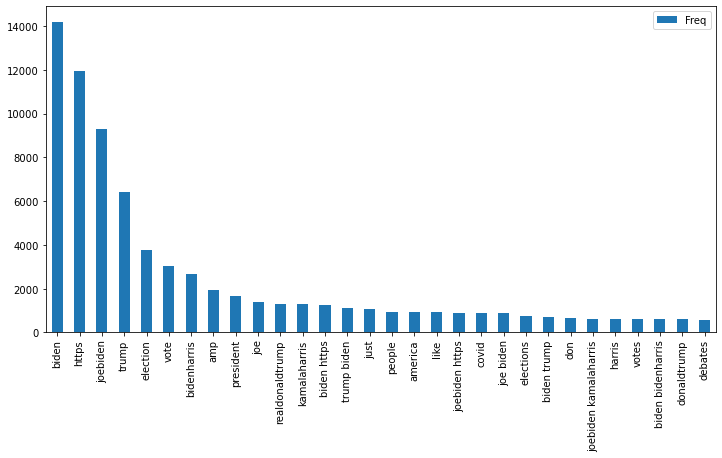

In [95]:
frecuencias.head(30).plot(kind='bar', figsize=(12,6))

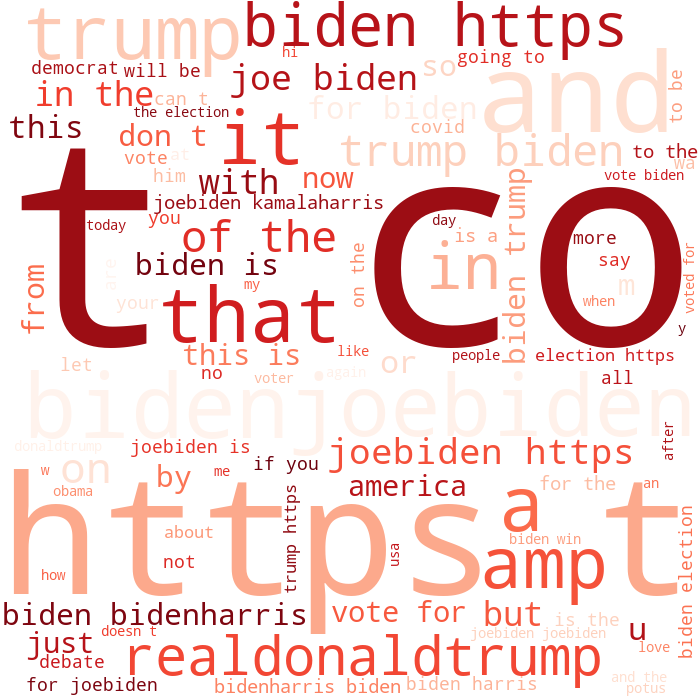

In [96]:
cloud=WordCloud(background_color='white', width=700, height=700, max_words=100, max_font_size=300, stopwords="english", colormap='Reds',random_state=23) # Construyo el generador de la nube
cloud.generate('.'.join(list(jb.tweet))) # Genero la nube
cloud.to_image()

In [99]:
num_topics=10 # Cuántos tópicos deseo
lda = LatentDirichletAllocation(n_components=num_topics, max_iter=10,doc_topic_prior=0.1, topic_word_prior=0.1,random_state=23, verbose=1) # Construyo el objeto que es el modelo
lda.fit(tf) # Estimo el LDA

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


LatentDirichletAllocation(doc_topic_prior=0.1, random_state=23,
                          topic_word_prior=0.1, verbose=1)

In [100]:
# Construyo la función que me ayuda a ver las palabras más importantes de cada tópico
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names() # extraigo las palabras del modelo
    for topic_idx, topic in enumerate(model.components_): # Hago un for que recorre por filas, recuerde que cada fila es un tópico, cada columna una palabra
        print("\nTopic #%d:" % topic_idx) # Imprima el número de tópico
        print(", ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]])) #Muestre las n palabras más importantes por orden 

In [101]:
print_topics(lda, tf_vectorizer, 15)


Topic #0:
trump, biden, https, trump biden, election, biden https, covid, biden trump, vote, coronavirus, trump https, harris, democrats, biden harris, republican

Topic #1:
bidenharris, biden, https, biden bidenharris, bidenharris biden, vote, wins, biden biden, bidenharristosaveamerica, bidenharris https, joebiden bidenharris, biden wins, biden https, election, joebiden

Topic #2:
biden, https, trump, joebiden, debates, debate, joe, amp, hunter, hunterbiden, china, joe biden, family, biden https, presidentialdebate

Topic #3:
vote, biden, https, trump, joebiden, amp, like, america, vote biden, don, obama, vote joebiden, realdonaldtrump, plan, make

Topic #4:
election, https, biden, trump, joebiden, elections, electionday, donaldtrump, election https, la, en, trump biden, electionnight, el, election biden

Topic #5:
joebiden, https, joebiden https, kamalaharris, realdonaldtrump, joebiden joebiden, joebiden kamalaharris, cnn, michigan, florida, msnbc, donaldtrump, pennsylvania, potus,

In [ ]:
["trump+", "joe+", "biden+", "want", "cnn", "kamala", "palabras de dos cifras", "https"]

In [ ]:
##HAY QUE ELIMINAR TODAS LAS PALABRAS COMO JOE BIEN Y TRUMO Y SUS VARIANTES, KAMALA, HTTPS, DEBATES O CAMBIARLAS

In [102]:
# Como se ven los documentos?
lda_output=lda.transform(tf) # transformo la matrix de término-documento en tópico-documento
print(lda_output.shape) # Qué indican las dimensiones?
docs=['doc'+str(i) for i in range(lda_output.shape[0])] # Nombres de filas
topics=['topics'+str(i) for i in range(lda_output.shape[1])] # Nombres de columnas
lda_output=pd.DataFrame(lda_output, index=docs, columns=topics)

(18303, 10)


In [103]:
lda_output
#CADA DOCUMENTO IMPLICA LA PROBABILIDAD

topics0   topics1   topics2   topics3   topics4   topics5  \
doc0      0.007144  0.007144  0.935698  0.007145  0.007144  0.007144   
doc1      0.012501  0.012502  0.244286  0.012501  0.012501  0.012502   
doc2      0.003226  0.838196  0.003227  0.003227  0.003226  0.003227   
doc3      0.005002  0.005001  0.005001  0.005002  0.005001  0.005001   
doc4      0.020003  0.020004  0.020003  0.020002  0.020002  0.020000   
...            ...       ...       ...       ...       ...       ...   
doc18298  0.006251  0.006251  0.490808  0.006251  0.006251  0.459187   
doc18299  0.011114  0.011112  0.011115  0.420736  0.011112  0.011114   
doc18300  0.007144  0.007144  0.559252  0.007145  0.007143  0.383595   
doc18301  0.012503  0.646681  0.253293  0.012508  0.012502  0.012503   
doc18302  0.774962  0.025008  0.025007  0.025004  0.025005  0.025005   

           topics6   topics7   topics8   topics9  
doc0      0.007147  0.007144  0.007143  0.007148  
doc1      0.655701  0.012506  0.012500  0.012501  
doc2      0.003227  0.003226  0.003226  0.135992  
doc3      0.005001  0.598927  0.111846  0.254218  
doc4      0.819975  0.020008  0.020000  0.020002  
...            ...       ...       ...       ...  
doc18298  0.006251  0.006250  0.006250  0.006251  
doc18299  0.011113  0.011112  0.011111  0.490362  
doc18300  0.007145  0.007144  0.007143  0.007146  
doc18301  0.012501  0.012501  0.012502  0.012505  
doc18302  0.025002  0.025003  0.025001  0.025003  

[18303 rows x 10 columns]

In [104]:
# Creemos la pertenencia al tópicos
topico_dominante = np.argmax(lda_output.values, axis=1) 
lda_output['Topico_dominante']=topico_dominante
lda_output.head(10)

topics0   topics1   topics2   topics3   topics4   topics5   topics6  \
doc0  0.007144  0.007144  0.935698  0.007145  0.007144  0.007144  0.007147   
doc1  0.012501  0.012502  0.244286  0.012501  0.012501  0.012502  0.655701   
doc2  0.003226  0.838196  0.003227  0.003227  0.003226  0.003227  0.003227   
doc3  0.005002  0.005001  0.005001  0.005002  0.005001  0.005001  0.005001   
doc4  0.020003  0.020004  0.020003  0.020002  0.020002  0.020000  0.819975   
doc5  0.066865  0.003848  0.564238  0.003848  0.003846  0.003847  0.060929   
doc6  0.016673  0.016668  0.016668  0.016668  0.016669  0.409207  0.016672   
doc7  0.016676  0.016667  0.016674  0.414864  0.016667  0.451776  0.016671   
doc8  0.020004  0.020005  0.819978  0.020002  0.020003  0.020003  0.020001   
doc9  0.004764  0.451417  0.257635  0.171543  0.090829  0.004762  0.004763   

       topics7   topics8   topics9  Topico_dominante  
doc0  0.007144  0.007143  0.007148                 2  
doc1  0.012506  0.012500  0.012501                 6  
doc2  0.003226  0.003226  0.135992                 1  
doc3  0.598927  0.111846  0.254218                 7  
doc4  0.020008  0.020000  0.020002                 6  
doc5  0.003847  0.003846  0.284887                 2  
doc6  0.016668  0.016667  0.457441                 9  
doc7  0.016668  0.016667  0.016670                 5  
doc8  0.020002  0.020001  0.020002                 2  
doc9  0.004762  0.004762  0.004763                 1

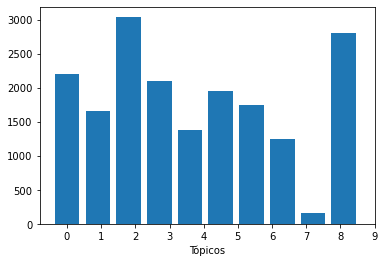

In [105]:
plt.hist(lda_output.Topico_dominante, density=False, rwidth=0.8, align='left')
plt.xlabel('Tópicos')
plt.xticks(range(num_topics));

In [107]:
%%time
# Juguemos con un hiper parámetro
likelihood=[]
values=[i for i in range(2,31,2)]
for i in values:
    modelo = LatentDirichletAllocation(n_components=i, max_iter=10,doc_topic_prior=0.1, topic_word_prior=0.1,random_state=23) # Construyo el objeto que es el modelo
    modelo.fit(tf)
    likelihood.append(modelo.score(tf))
    print(i)

2


KeyboardInterrupt: 

In [ ]:
# Visualizamos
plt.figure(figsize=(6,6))
plt.plot(values, likelihood)
plt.xlabel('Número de tópicos')
plt.ylabel('log-likelihood')

In [ ]:
import pyLDAvis # Paquete que crea la visualización
from pyLDAvis import sklearn as sklearnlda
LDAvis_prepared=sklearnlda.prepare(lda, tf, tf_vectorizer ) # Preparo el modelo y sus resultados para la visualización
pyLDAvis.save_html(LDAvis_prepared, 'LDA.html') # Guardo la visualización como html